# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    return (x**2)*numpy.sin(x)
numpy.vectorize(f)
x=numpy.array([0,0.1,0.2,0.3,0.4])
print(f(x))

[0.         0.00099833 0.00794677 0.02659682 0.06230693]


Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    return 2*x*numpy.sin(x)+(2-x**2)*numpy.cos(x)-2
numpy.vectorize(g(x))
x=numpy.array([0., 0.00002497,0.1497043])
print(g(x))

[0.         0.         0.00012526]


Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [9]:
def g(x):
    return 2*x*numpy.sin(x)+(2-x**2)*numpy.cos(x)-2
numpy.vectorize(g)

def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin)
numpy.vectorize(integrate_analytic)

print(integrate_analytic(0,4))


1.0965907296271418


Check your analytic function:

In [10]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [16]:
def f(x):
    return (x**2)*numpy.sin(x)
numpy.vectorize(f)

def integrate_numeric(xmin, xmax, N):
    h=(xmax-xmin)/(2*N)
    y=0
    for i in range(0,N):
        xi=2*h*i
        int_panel=h*(f(xi)+4*f(xi+h)+f(xi+2*h))/3
        y += int_panel
    return y
numpy.vectorize(integrate_numeric)
print (integrate_numeric(0,4,50))

1.0965909955991093


Make sure you have implemented Simpson's rule correctly:

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [17]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'log(fractional error) as a function of log(number of panels)')

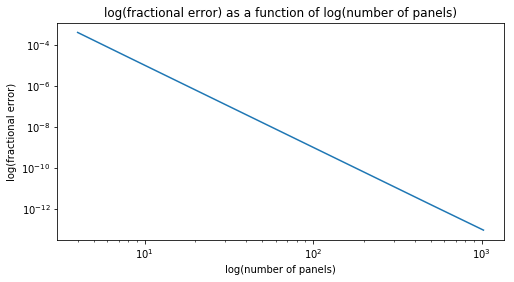

In [18]:
import math
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024])  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
fractional_errors=[abs(integrate_numeric(x0,x1,N)-result_analytic) for N in panel_counts]

plt.figure(figsize=(8, 4))
plt.plot(panel_counts,fractional_errors)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log(number of panels)")
plt.ylabel("log(fractional error)")
plt.title("log(fractional error) as a function of log(number of panels)")


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

- The error decreases as a function of the number of panels - the higher the number of panels, the smaller the error is (hence better accuracy), due to the fact that smaller panels cover a region which is closer to the point where we approximate the function.

- If the number of panels is taken too large, the limited numerical precision of the computer (16 digits) affects the accuracy - at first the error decreases very rapidly (the slope is steep) but after the numerical precision limit of the computer is reached, the error starts fluctuating and increasing. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

- The trapezium rule includes information about the first derivative of the function. 
- Increasing the order of approximation leads to a quciker decrease in the error with increasing the number of panels (steeper slope). 
- Methods using higher order approximations reach the numerical precision limit more quickly (a smaller number of panels is required).
- Comparing the trapezium rule to the Simpson's rule and other higher order approximations, it will take a greater number of panels to reach this limit (because its slope is not as steep). 
